In [1]:
import pickle

# Enhancer Dataset

In [2]:
file_path1 = 'data/the_code/Fly/data/deepflybrain/DeepFlyBrain_nonAugmented_data.pkl'
"""
# of Sequences: 104,665
length of sequences: 500
"""

file_path2 = 'data/the_code/Fly/data/deepflybrain/FLY_KC_EFS_6000_withmut.pkl'
"""
# of Sequences: 104,665
length of sequences: 500
"""

file_path3 = 'data/the_code/Fly/data/deepflybrain/FLY_KC_RandomDrift_6000_withmut.pkl'
"""
# of Sequences: 6,000
length of sequences: 500
"""

file_path4 = 'data/the_code/Fly/data/deepflybrain/FLY_PNG_EFS_500_withmut.pkl'
"""
# of Sequences: 500
length of sequences: 500
"""

file_path5 = 'data/the_code/General/data/DeepFlyBrain_data.pkl'
"""
# of Sequences: 104,665
length of sequences: 500
"""

file_path6 = 'data/the_code/General/data/DeepMEL2_data.pkl'
"""
# of Sequences: 104,665
length of sequences: 500
"""

'\n# of Sequences: 104,665\nlength of sequences: 500\n'

In [9]:
with open(file_path5, 'rb') as f:
    data = pickle.load(f)

In [10]:
print(type(data))

<class 'dict'>


In [11]:
keys = list(data.keys())
keys

['nonAugmented_data',
 'nonAugmented_y',
 'train_data',
 'y_train',
 'valid_data',
 'y_valid',
 'test_data',
 'y_test']

In [12]:
# Data type numpy arrays
nonAugmented_data = data['nonAugmented_data']
nonAugmented_y = data['nonAugmented_y']
train_data = data['train_data']
y_train = data['y_train']
valid_data = data['valid_data']
y_valid = data['y_valid']
test_data = data['test_data']
y_test = data['y_test']

In [13]:
import copy
import pickle

import torch, esm, random, os, json
import numpy as np

In [14]:
data['X'][0]

KeyError: 'X'

In [22]:
print(data['seq'][0][0] == 'T')
print(data['seq'][0][1] == 'C')
print(data['seq'][0][4] == 'A')
print(data['seq'][0][2] == 'G')

True
True
True
True


In [25]:
print(f"T: {data['X'][0][0]}")
print(f"C: {data['X'][0][1]}")
print(f"A: {data['X'][0][4]}")
print(f"G: {data['X'][0][2]}")

T: [0 0 0 1]
C: [0 1 0 0]
A: [1 0 0 0]
G: [0 0 1 0]


In [ ]:
"""

A: [1 0 0 0]
C: [0 1 0 0]
G: [0 0 1 0]
T: [0 0 0 1]

"""

In [16]:
len(data['pred'][0])

81

In [9]:
type(data['y_train'][0])

numpy.ndarray

In [12]:
train_data.shape

(70892, 500, 4)

In [111]:
# from_numpy turns numpy array into Tensor

torch.argmax(torch.from_numpy(train_data), dim=-1)

tensor([[1, 0, 1,  ..., 2, 1, 2],
        [2, 0, 1,  ..., 3, 2, 0],
        [3, 3, 2,  ..., 2, 3, 2],
        ...,
        [0, 3, 3,  ..., 0, 2, 0],
        [3, 1, 0,  ..., 0, 0, 2],
        [3, 3, 3,  ..., 2, 1, 1]])

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
len(y_train[0])

47

In [22]:
type(train_data[0])

numpy.ndarray

In [23]:
train_data.shape

(83726, 500, 4)

In [14]:
ids_train = data['ids_train']
ids_train[70800:]

array(['chr21:46391804-46392304', 'chr21:46392769-46393269',
       'chr21:46429963-46430463', 'chr21:46432218-46432718',
       'chr21:46496051-46496551', 'chr21:46529633-46530133',
       'chr21:46545955-46546455', 'chr21:46549266-46549766',
       'chr21:46556938-46557438', 'chr21:46572144-46572644',
       'chr21:46686367-46686867', 'chr21:46690088-46690588',
       'chr21:46707555-46708055', 'chr21:46712341-46712841',
       'chr21:46726867-46727367', 'chr21:46737399-46737899',
       'chr21:46738794-46739294', 'chr21:46739406-46739906',
       'chr21:46742687-46743187', 'chr21:46745955-46746455',
       'chr21:46749923-46750423', 'chr21:46769639-46770139',
       'chr21:46783903-46784403', 'chr21:46785667-46786167',
       'chr21:46786777-46787277', 'chr21:46798034-46798534',
       'chr21:46806876-46807376', 'chr21:46824820-46825320',
       'chr21:46840377-46840877', 'chr21:46847572-46848072',
       'chr21:46875144-46875644', 'chr21:46880493-46880993',
       'chr21:46890728-4

In [15]:
len(ids_train)

70892

# Promoter Dataset

In [16]:
ref_file = 'data/promoter_design/Homo_sapiens.GRCh38.dna.primary_assembly.fa'
ref_file_mmap = 'data/promoter_design/Homo_sapiens.GRCh38.dna.primary_assembly.fa.mmap'
tsses_file = 'data/promoter_design/FANTOM_CAT.lv3_robust.tss.sortedby_fantomcage.hg38.v4.tsv'

fantom_files = [
    "data/promoter_design/agg.plus.bw.bedgraph.bw",
    "data/promoter_design/agg.minus.bw.bedgraph.bw"
]
fantom_blacklist_files = [
    "data/promoter_design/fantom.blacklist8.plus.bed.gz",
    "data/promoter_design/fantom.blacklist8.minus.bed.gz"
]

In [17]:
from Bio import SeqIO

In [18]:
sequences_ref_file = SeqIO.parse(ref_file, "fasta")

In [19]:
for record in sequences_ref_file:
    print(record)
    test_record = record
    break

ID: chr1
Name: chr1
Description: chr1 dna:chromosome chromosome:GRCh38:1:1:248956422:1 REF
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN')


In [20]:
sequence = test_record.seq
len(sequence)

248956422

In [21]:
start = None
for i in range(len(sequence)):
    if sequence[i] != 'N':
        new = i
        break
start

In [22]:
end = None
for i in range(len(sequence)-1,-1,-1):
    if sequence[i] != 'N':
        end = i
        break
end

248946421

In [23]:
from pyfaidx import Fasta

In [24]:
fasta = Fasta(ref_file)  # Note: point to the .fa file, not .mmap

# Access sequences
print(fasta.keys())  # Show all sequence names

odict_keys(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY'])


In [25]:
import pandas as pd 

df = pd.read_table(tsses_file, sep='\t')
# df.drop('Unnamed: 0')

In [26]:
df.head()

,Unnamed: 0,chr,strand,TSS,geneID,geneName,geneClass,geneCategory,DHS_type,geneType,...,FANTOM_CAGE_scaled,ENCODE_CAGE_scaled,ENCODE_RAMPAGE_scaled,GROCAP_K562_scaled,GROCAP_GM12878_scaled,Cor_ENCODE_CAGE,Cor_ENCODE_RAMPAGE,Cor_GROCAP_K562,Cor_GROCAP_GM12878,Cor
0,0,chr7,-,5530600,ENSG00000075624.9,ACTB,coding_mRNA,coding_mRNA,DHS_promoter,protein_coding,...,13066.7030,3314.745732,5380.018989,94.458534,107.713155,0.808222,0.675124,0.527904,0.330566,0.801382
1,1,chr17,-,81512798,ENSG00000184009.5,ACTG1,coding_mRNA,coding_mRNA,DHS_promoter,protein_coding,...,11934.1770,1128.411811,8417.391196,412.346008,1373.448001,0.851327,0.731730,0.756814,0.651876,0.837787
2,2,chr11,+,65499044,ENSG00000251562.3,MALAT1,lncRNA_intergenic,p_lncRNA_intergenic,DHS_promoter,lincRNA,...,10317.4550,1295.203957,8488.964132,505.009042,290.191864,0.527994,0.380546,0.385937,0.338789,0.900356
3,3,chr12,+,6534516,ENSG00000111640.10,GAPDH,coding_mRNA,coding_mRNA,DHS_promoter,protein_coding,...,7894.4653,1212.428301,2541.383513,2.693116,8.553690,0.804801,0.655594,0.315494,0.246319,0.924931
4,4,chr19,+,48965308,ENSG00000087086.9,FTL,coding_mRNA,__na,DHS_dyadic,protein_coding,...,7002.6943,768.713242,4440.219741,236.196283,326.201768,0.742599,0.595579,0.752805,0.758771,0.870189


In [1]:
import pandas as pd
texas = pd.read_excel("data/aptamer/utexas.xlsx")

In [2]:
needed = texas[['Aptamer Sequence', 'Target ']]

In [3]:
needed['Aptamer Sequence'] = needed['Aptamer Sequence'].str[2:-2]

/tmp/ipykernel_2390898/3898652566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed['Aptamer Sequence'] = needed['Aptamer Sequence'].str[2:-2]


In [4]:
needed = needed[~needed['Aptamer Sequence'].str.upper().str.contains('X')].copy()


In [5]:
needed = needed[~needed['Aptamer Sequence'].str.upper().str.contains('N')].copy()


In [6]:
needed['Aptamer Sequence'] = needed['Aptamer Sequence'].str.replace('U', 'T', case=False) 

In [7]:
import re
needed['Aptamer Sequence'] = needed['Aptamer Sequence'].str.upper().apply(lambda s: re.sub(r'[^ATCG]', '', s))

In [8]:
needed['Aptamer Sequence'].str.upper().str.contains('U').sum()

0

In [ ]:
import numpy as np
def one_hot_encode_dna(df, column_name, new_column_name='onehot'):
    """
    One-hot encode DNA sequences in a DataFrame and store the result in a new column.

    Each nucleotide is mapped as follows:
    A -> [1, 0, 0, 0]
    C -> [0, 1, 0, 0]
    G -> [0, 0, 1, 0]
    T -> [0, 0, 0, 1]

    Parameters:
        df (pd.DataFrame): The input DataFrame with DNA sequences.
        column_name (str): The name of the column containing sequences.
        new_column_name (str): The name of the new column for one-hot output.

    Returns:
        pd.DataFrame: The DataFrame with the new column added.
    """
    mapping = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1],
    }

    def encode_sequence(seq):
        return np.array([mapping.get(base, [0, 0, 0, 0]) for base in seq], dtype=np.float32)

    df = df.copy()
    df[new_column_name] = df[column_name].apply(encode_sequence)
    return df

In [10]:
encoded = one_hot_encode_dna(needed, 'Aptamer Sequence')

NameError: name 'np' is not defined

In [27]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode_proteins(df, column_name='protein', new_column_name='protein_onehot'):
    """
    One-hot encodes protein names into a new column with NumPy arrays.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with a protein name column.
        column_name (str): Column containing protein names.
        new_column_name (str): Name of the output one-hot column.

    Returns:
        df (pd.DataFrame): DataFrame with new one-hot encoded column.
        classes (list): List of protein names in the order of the encoding.
    """
    lb = LabelBinarizer()
    onehot = lb.fit_transform(df[column_name])
    
    # Add the array as a new column
    df = df.copy()
    df[new_column_name] = list(onehot)
    
    return df, lb.classes_

In [28]:
encoded, protein_classes = one_hot_encode_proteins(encoded, column_name='Target ', new_column_name='protein_onehot')

print(f"Protein classes: {protein_classes}")

Protein classes: ['(1→3)-β-D-glucans' '(R)-ibuprofen' '(S)-ibuprofen'
 "1,1,1-trichloro-2-(p-chlorophenyl)-2-(o-chlorophenyl) ethane (O,p'-DDT)"
 '16mer (16-amino acid peptide from collagen XIα1) peptide of the C-telopeptide from human collagen XIα1 (colXIα1)'
 '17 beta-Estradiol (17β-Estradiol) (E2）' '25-HydroxyvitaminD3'
 '4,4′-Bisphenol (BP)' '4,4′-methylenedianiline (MDA)'
 '6 fluorine atoms difference bisphenol A (6F BPA)'
 '6xHIS–LiPABP protein (rLiPABP)' '8-hydroxy-2′-deoxyguanosine (8-OHdG)'
 'ADP-ribosylation factors (ARF) nucleotide-binding site opener (ARNO)/cytohesin-2'
 'AIB1 CBP/p300-interaction domain' 'ATP (Adenosine triphosphate)'
 'Abrin toxin' 'Abrin toxin, Abrus precatorius (A.precatorius)'
 'Acetamiprid' 'Acetylcholine' 'Activated protein C (APC), Human'
 'Acute myeloid leukemia cells (HL60)'
 'Acute promyelocytic leukemia (APL) NB4 cell line' 'Adenine'
 'Adenosine and Adenosine Triphosphate (ATP)'
 'Adenosine triphosphate (ATP)' 'Adenosine triphosphate (ATP)\n'
 '

In [30]:
encoded.head()

,Aptamer Sequence,Target,onehot,protein_onehot
0,GGGAGAATTCCCGCGGCAGAAGCCCACCTGGCTTTGAACTCTATGT...,Cibacron Blue 3GA,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,GGGAGAATTCCCGCGGCGTTGGCCCAGGATAATAGGACGAAATCCG...,Reactive Blue 4,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,GAATTGTGGTGTTGGCTCCCTATAGTGAGTCGTATTAATATTCCTT...,T4 DNA polymerase (gp43),"[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,GAATTGTGGTGTTGGCTCCCTATAGTGAGTCGTATTAATATTCCTT...,T4 DNA polymerase (gp43),"[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,GGTTGGTGTGGTTGG,"Thrombin (Sigma), Human","[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [31]:
# tensor = torch.tensor(np.stack(encoded['onehot'].values), dtype=torch.float32)

In [34]:
lengths = []
for seq in encoded['Aptamer Sequence']:
    lengths.append(len(seq))

In [32]:
import matplotlib.pyplot as plt

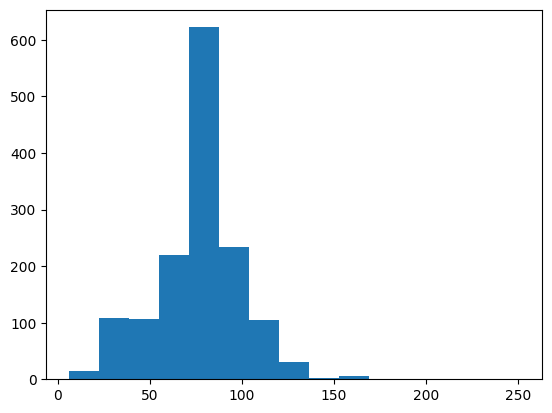

In [35]:
plt.hist(lengths, bins = 15)
plt.show()

In [36]:
print(f'Median: {np.median(lengths)}')
print(f'Mean: {np.mean(lengths)}')
print(f'Standard Deviation: {np.std(lengths)}')

Median: 80.0
Mean: 77.01863354037268
Standard Deviation: 23.51098442156245


In [37]:
def pad_or_truncate_sequences(df, seq_col='sequence', target_len=100, pad_char='T'):
    df = df.copy()
    def normalize(seq):
        if len(seq) > target_len:
            return seq[:target_len]  # truncate if too long
        return seq + pad_char * (target_len - len(seq))  # pad with 'T' if too short
    df[seq_col + "_padded"] = df[seq_col].apply(normalize)
    return df


In [38]:
encoded = encoded.drop('onehot', axis=1)

In [39]:
encoded['aptamer_sequence'] = encoded['Aptamer Sequence']
encoded = encoded.drop('Aptamer Sequence', axis=1) 

In [40]:
encoded

,Target,protein_onehot,aptamer_sequence
0,Cibacron Blue 3GA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GGGAGAATTCCCGCGGCAGAAGCCCACCTGGCTTTGAACTCTATGT...
1,Reactive Blue 4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GGGAGAATTCCCGCGGCGTTGGCCCAGGATAATAGGACGAAATCCG...
2,T4 DNA polymerase (gp43),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GAATTGTGGTGTTGGCTCCCTATAGTGAGTCGTATTAATATTCCTT...
3,T4 DNA polymerase (gp43),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GAATTGTGGTGTTGGCTCCCTATAGTGAGTCGTATTAATATTCCTT...
4,"Thrombin (Sigma), Human","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GGTTGGTGTGGTTGG
...,...,...,...
1458,Coagulation Factor IXa (FIXa),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ATGGGGACTATACCGCGTAATGCTGCCTCCCCAT
1459,D-arginine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CGGATGGAAGGCGTGGTTAGAATCCAATAGCCCATCCG
1460,L-arginine,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CGGATGGAAGGCGTGGTTAGAATCCAATAGCCCATCCG
1461,Recombinant insulin receptor extracellular dom...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",GCCTGTATCCGCAGTATCGGCATTCAGCGAC


In [41]:
encoded = pad_or_truncate_sequences(encoded, 'aptamer_sequence', 128)

In [42]:
encoded = encoded.drop('onehot', axis=1)

KeyError: "['onehot'] not found in axis"

In [43]:
encoded = one_hot_encode_dna(encoded, 'aptamer_sequence_padded', 'onehot_padded')

In [128]:
encoded.to_csv("data/aptamer/aptamer_seq_utexas.csv")

In [44]:
len(encoded['onehot_padded'][0])

128

In [113]:
torch.argmax(torch.tensor(np.stack(encoded['onehot_padded'].values), dtype=torch.float32), dim=-1)

tensor([[2, 2, 2,  ..., 3, 3, 1],
        [2, 2, 2,  ..., 3, 3, 0],
        [2, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 2, 2,  ..., 3, 3, 3],
        [2, 1, 1,  ..., 3, 3, 3],
        [3, 3, 3,  ..., 3, 3, 3]])

In [75]:
for seq in np.array(encoded['onehot_padded']):
    for char in seq:
        if len(char) != 4:
            print("NOT 4")

In [72]:
np.array(encoded['onehot_padded'])

array([array([[0., 0., 1., 0.],
              [0., 0., 1., 0.],
              [0., 0., 1., 0.],
              [1., 0., 0., 0.],
              [0., 0., 1., 0.],
              [1., 0., 0., 0.],
              [1., 0., 0., 0.],
              [0., 0., 0., 1.],
              [0., 0., 0., 1.],
              [0., 1., 0., 0.],
              [0., 1., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0., 1., 0.],
              [0., 1., 0., 0.],
              [1., 0., 0., 0.],
              [0., 0., 1., 0.],
              [1., 0., 0., 0.],
              [1., 0., 0., 0.],
              [0., 0., 1., 0.],
              [0., 1., 0., 0.],
              [0., 1., 0., 0.],
              [0., 1., 0., 0.],
              [1., 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 0., 1.],
              [0., 0., 1., 0.],
              [0., 0., 1., 0.],
        

In [56]:
train_data.shape

(70892, 500, 4)

In [69]:
train_data.shape

(70892, 500, 4)